# Summary: <a id='summary'></a>

1. [Introduzione ai dati ed obiettivo del lavoro;](#intro)


2. [Ipotesi sulle features;](#hp)


3. [Importazione delle librerie;](#Librerie)


4. [Import del Dataset;](#dataset)


5. [Analisi dei dati;](#Data_exploration)

6. [Cleaning dei dati;](#cleaning)


7. [Data Visualization;](#Data_Visualization)

8. [Codifica One hot;](#onehot)


9. [Machine Learning;](#ML)
    - [Preprocessing dei dati;](#Preprocessing)
    - [Scelta dei modelli di regressione;](#Scelta)
      - [Modello KNN](#KNN)
           - [Validazione parametri con "Randomized_search_cv" ](#val)
      - [Modello SVR](#SVR)
           - [Validazione parametri con "Randomized_search_cv" ](#val1)
      - [Modello Random Forest](#RF)
           - [Validazione parametri con "Randomized_search_cv" ](#val2)
      - [Modello Gradient Boosting](#GB)
           - [Validazione parametri con "Randomized_search_cv" ](#val3)
    - [Sintesi dei risultati;](#sintesi)
    - [Rappresentazione grafica miglior modello](#grafico)
    - [Importanza delle features](#features)
    
10. [Riaddestramento modello](#riaddestramento)
11. [Valutazione dell'importanza delle features e conclusioni finali](#end)

# Introduzione ai dati ed obiettivo del lavoro<a id='intro'></a>

Scopo del presente lavoro è quello di predire, considerate le variabili di partenza, il voto finale conseguito dagli studenti al termine del corso di portoghese (lingua madre degli studenti). Il dataset che si andrà ad utilizzare (il quale può essere visionato e scaricato al seguente link https://www.kaggle.com/uciml/student-alcohol-consumption) consta di un totale di 32 features principali (alle quali si aggiunge la variabile indagata), che si è scelto di suddividere in 5 gruppi totali con l'obiettivo di favorire una più lineare lettura, comprensione e commento dei risultati ottenuti:


**VARIABILI INDIPENDENTI**

**Informazioni personali:**
- scuola di appartenenza;
- sesso dello studente;
- età espressa in anni;
- indirizzo di casa;
- stato di salute;
- ragione che ha spinto a scegliere la scuola;

**Caratteristiche familiari:**
- numero di componenti della famiglia;
- Educazione del padre;
- Lavoro del padre;
- Lavoro della madre;
- Educazione della madre;
- qualità delle relazioni famigliari;
- Soggetto incaricato della tutela dello studente;

**Consuetudini comportamentali scolastiche:**
* ore di studio;
* utilizzo dopo scuola;
* corsi di supporto della materia a pagamento;
* attività extracurricolari;
* frequenza corso di infermiere;

**Consuetudini extra-scolastiche:**
* fidanzato/a;
* tempo libero;
* tempo trascorso fuori da casa;
* consumo di alcool infrasettimanale;
* consumo di alcool nel weekend;

**Altre:**
* tempo impiegato per raggiungere la scuola;
* volontà di proseguire gli studi;
* accesso ad internet (da casa);
* numero di assenze;
* voto nel primo perido;
* voto nel secondo perido;

**VARIABILE DIPENDENTE:**
* voto finale corso di portoghese;



Ai fini della valutazione circa la bontà di predizione del modello si utilizzeranno il **'Mean Absolute Error' (MAE)** ed il coefficiente di determinazione ($R^{2}$) definiti matematicamente dalle seguenti formule:


$$MAE= \frac{1}{n}\sum_{j=1}^{n} |y_{j}-\hat{y}_{j}|$$

$$R^{2}= 1 - \frac{RSS}{TSS} $$        
dove RSS e TSS rappresentano rispettivamente la devianza totale e quella residua e sono definiti come:
$$TSS=\sum_{j=1}^{n} (y_{j}-\bar{y})^2$$
$$RSS=\sum_{j=1}^{n} (y_{j}-\hat{y}_{j})^2$$

Nelle formule considerate ${y}_{j}$ rappresenta il *j-esimo* valore osservato, $\bar{y}$ identifica il valore medio e $\hat{y}_{j}$ individua il *j-esimo* valore predetto dal modello.

Più in particolare, il **MAE** è rappresentativo di un indice volto a individuare l'abilità predittiva del modello di regressione adottato considerando l'errore medio commesso dallo stesso, definito come differenza -in valore assoluto- tra i valori predetti ($\hat{y}_{j}$) rispetto a quelli osservati contenuti nel dataset (${y}_{j}$): tanto minore sarà tale scarto tanto maggiore risulterà la bontà del modello in fase di previsione. 
<br>
Anche il coefficiente di determinazione rientra nel novero delle metriche di regressione, e si configura come un indice che misura il legame tra la variabilità dei dati e la correttezza del modello statistico utilizzato; esso è legato alla frazione della varianza non spiegata dal modello: un valore di $R^2$ elevato caratterizzerà un buon modello il quale sarà in grado di spiegare un'alta percentuale della variabilità del fenomeno osservato.

## Ipotesi sulle features <a id='hp'></a>

La variabile dipendente che il presente *notebook* si propone di indagare, come anticipato, è 'G3' rappresentativa del voto finale conseguito da un *pool* di studenti portoghesi di età varia. Osservando la tipologia di variabili cui l'EDA si sostanzia, in tal paragrafo si vuole fornire  al lettore una prima idea di quelli che saranno i risultati attesi dall'analisi. In tal senso ci si aspetta che le variabili contenute nel gruppo **caratteristiche familiari** (qualità delle relazioni familiari ed educazione dei genitori su tutte) e **consuetudini comportamentali scolastiche** (ore di studio in particolare) influenzino principalmente la qualità della performance accademica. Accanto a queste, si ipotizza che un ruolo chiave venga rivestito dalle feature 'consumo di alcool nel weekend', 'consumo di alcool infrasettimanale', 'numero di assenze' e 'tempo libero'.  

#  Importazione delle librerie <a id='Librerie'></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable # modulo utile per la creazione di tabelle riassuntive dei risultati 
from sklearn import datasets,ensemble
from sklearn.preprocessing import scale # scalatura dei dati
#importiamo i modelli che utilizzeremo per le predizioni
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error # metrica utile ai fini della valutazione del modello
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #strumento che permette di dividere il dataset in train e test
from sklearn.model_selection import RandomizedSearchCV # tecnica di tuning dei parametri

#  Import del dataset <a id='dataset'></a>

In [2]:
data = pd.read_csv(r"C:\Users\dellr\OneDrive\Desktop\file final project\student-por.csv", encoding='latin1')

# Analisi dei dati <a id='Data_exploration'></a>

In [3]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [4]:
data.info() #visualizzo le principali informazioni del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
data.isna().sum() # verifico la presenza di valori mancanti all'interno dei dati

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Da uno studio preliminare dei dati è possibile evincere che:
- Il dataset consta di un numero totale di 649 unità campionarie;
- Non sono presenti valori nulli, tuttavia 17 delle 33 variabili che compongono il dataset sono di tipo categorico, pertanto sarà necessario procedere a manipolare i dati in tal senso attraverso l'ausilio della codifica One hot; 

# Cleaning dei dati <a id='cleaning'></a>

Prima di entrare nel vivo della fase di **data visualization** si vuole procedere con lo step di **cleaning** dei dati con l'obbiettivo di individuare ed eliminare dal dataset quelle variabili ritenute superflue, perchè considerate minormente correlate rispetto al voto finale o eventualmente caratterizzate dalla presenza di collinearità con altre già presenti. 
Per tali motivi si procederà ad eliminare le variabili 'Fjob', 'Mjob' e 'nursery' reputando queste non particolarmente rilevanti in ottica di determinazione del voto finale. 
Alla lista di *features* da rimuovere si annovera inoltre 'romantic', eliminata in considerazione della presenza di collinearità con la variabile 'goout': se uno studente intrattiene una relazione romantica tale caratteristica sarebbe rivelata dalla varibile 'goout'.

In [6]:
data=data.drop(columns=['Fjob','Mjob','nursery','romantic'])

# Data Visualization <a id='Data_Visualization'></a>

Di seguito si definiscono le funzioni 'Calcolo_Media', 'new_col' e 'new_col1' delle quali ci si avvarrà durante la fase di data visualization.
Nello specifico la prima funzione accogliendo come input la generica *feature* (di tipo categorico) restituisce per l'i-esima categoria, cui la variabile si compone, il numero totale di studenti associati ed il valore medio; le seconde, al contrario, sono state create con l'intento di rispondere ad una esigenza specifica cioè quella di ridurre -con riferimento alle variabili Fedu e Medu- il numero di categorie così da fornire una rappresentazione più chiara e netta delle relazioni riscontrate <span style = font-size:80%>$^{1}$ .</span> 
Più nello specifico, entrambe le *features* 'Fedu' e 'Medu' sono state trasformate da categoriche a variabili binarie: 
- ad un valore pari a 0 corrisponderà -al massimo- un livello di istruzione di scuola superiore;
- un valore pari a 1 indicherà un'istruzione di tipo universitaria o superiore; 
<br>
<br>    
<span style = font-size:80%>
$^{1}$ 
Risulta doveroso precisare, che i risultati ai quali saremmo pervenuti qualora non avessimo effettuato alcuna trasformazione sulle variabili sono in linea con quanto ottenuto.</span> 

In [7]:
def Calcolo_Media(feature):
    val= np.sort(data[feature].unique())
    for i in val:
        totale = data.loc[data[feature]==i, feature].count() #restituisco il numero di studenti associati alla feature inserita
        mean = data.loc[data[feature]==i, 'G3'].mean()  # Calcolo la media per la classe
        print("La feature '{}', in corrispondenza della categoria {}, consta di un numero totale di studenti pari a {} unità con una media che ammonta a {:.2f}." .format(feature, i, totale, mean))

In [8]:
def new_col(row): #funzione che assegna il valore 1 se il livello di istruzione del genitore è pari o superiore al secondo grado di istruzione altrimenti assegna 0
    if row['Fedu']>=3:
        res = 1
    else:
        res = 0
    return res

#creiamo la colonna 'Fedu_level' usando la funzione di sopra
data['Fedu_level'] = data.apply(new_col, axis=1)

In [9]:
def new_col1(row): #funzione che assegna il valore 1 se il livello di istruzione della madre è pari o superiore al secondo grado di istruzione altrimenti assegna 0
    if row['Medu']>=3:
        res = 1
    else:
        res = 0
    return res
data['Medu_level']= data.apply(new_col1, axis=1)

Di seguito si utilizzeranno differenti strumenti di analisi grafica con l'intento di individuare utili informazioni sui dati a disposizione.

### Informazioni generali sul campione

<AxesSubplot:xlabel='age'>

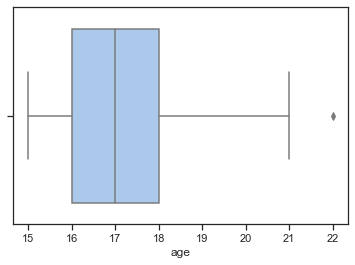

In [10]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="age", data=data)


Gli studenti oggetto del campione presentano un'età molto varia compresa tra i 15 ed i 22 anni. In particolare osservando la scatola a baffi è possibile evincere come il *pool* più significativo di studenti intervistati presenti un'età che va dai 16 ai 18 anni.   

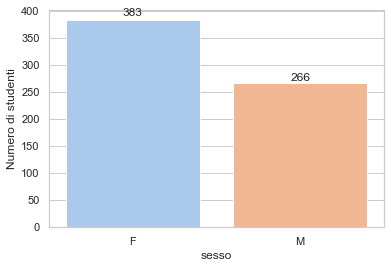

In [11]:
sns.set_theme(style="whitegrid",palette="pastel")
age = sns.countplot(x='sex',data=data)
plt.xlabel('sesso')
plt.ylabel('Numero di studenti')
# creiamo un loop for in modo da individuare su ogni barra il numero corrispondente al totale degli studenti divisi per sesso 
for p in age.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    age.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')


Il campione risulta caratterizzato prevalentemente da studenti di sesso femminile che rappresentano il 59% del totale.

### L'educazione dei genitori ha incidenza sul voto finale degli studenti?

La feature 'Fedu_level', in corrispondenza della categoria 0, consta di un numero totale di studenti pari a 390 unità con una media che ammonta a 11.41.
La feature 'Fedu_level', in corrispondenza della categoria 1, consta di un numero totale di studenti pari a 259 unità con una media che ammonta a 12.65.


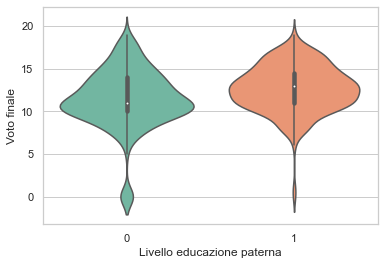

In [12]:
sns.set_theme(style="whitegrid")

sns.violinplot(data=data, x='Fedu_level',y='G3',palette='Set2') # violinplot che mette in relazione il grado di istruzione paterna con il voto finale
plt.xlabel('Livello educazione paterna')
plt.ylabel('Voto finale')
Calcolo_Media('Fedu_level')

La feature 'Medu_level', in corrispondenza della categoria 0, consta di un numero totale di studenti pari a 335 unità con una media che ammonta a 11.29.
La feature 'Medu_level', in corrispondenza della categoria 1, consta di un numero totale di studenti pari a 314 unità con una media che ammonta a 12.56.


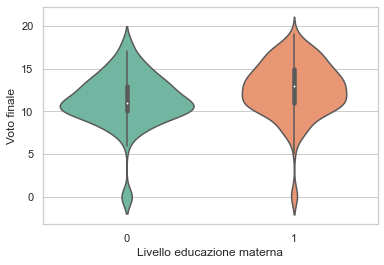

In [13]:
sns.violinplot(data=data, x='Medu_level',y='G3',palette='Set2') # violinplot che mette in relazione il grado di istruzione materna con il voto finale
plt.xlabel('Livello educazione materna')
plt.ylabel('Voto finale')
Calcolo_Media('Medu_level')

Da un'analisi dei grafici **violin plot** emerge con chiarezza la presenza di una relazione crescente esistente tra il livello di istruzione dei genitori ed il risultato scolastico (espresso in termini di voto finale per il corso di portoghese). Ciò è individuato non solo dalla forma dello strumento grafico, che evidenzia per la seconda categoria un livello di performance accademico migliore (il 50% degli studenti della categoria 1 esibiscono un risultato scolastico compreso tra 11 e 15) ma viene confermato anche dalle medie dei voti: in presenza di genitori con un grado di instruzione universitario o superirore gli studenti ottengono voti superiori di 1 punto rispetto ai soggetti che ricadono nell'altra categoria.

### La volontà di proseguire gli studi ed il grado di qualità dei rapporti famigliari influenzano G3?

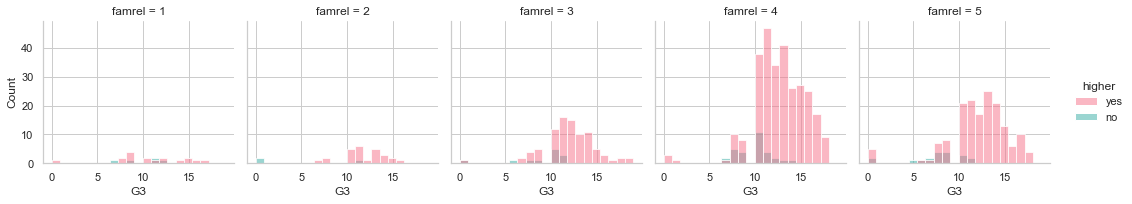

In [14]:
sns.displot(data=data, x="G3",hue="higher",col='famrel',height=3, palette='husl')

I grafici riportati evidenziano le relazioni tra le variabili *famrel* e *higher* rispetto alla feature *G3*. Da una prima valutazione è possibile osservare come gli studenti con l'intenzione di proseguire il loro percorso accademico esibiscano risultati (espressi in termini di voto finale) mediamente più elevati, il chè è sottolineato dalla forma platicurtica delle distribuzioni.
Ulteriore dato interessante trapela, con riferimento alla varibile *famrel*: questa parrebbe suggerire l'esistenza di un legame crescente tra il grado di qualità dei rapporti famigliari percepiti dagli studenti con il voto finale. Quest'ultima rilevazione si ben concilia con il paradigma secondo cui genitori presenti ed accorti nella vita dei propri figli contribuiscano a favorire le performance accademiche, risultato questo in linea con le ipotesi effettuate.   

### Gli studenti che partecipano ad attività extracurricolari esibiscono voti migliori?

La feature 'activities', in corrispondenza della categoria no, consta di un numero totale di studenti pari a 334 unità con una media che ammonta a 11.72.
La feature 'activities', in corrispondenza della categoria yes, consta di un numero totale di studenti pari a 315 unità con una media che ammonta a 12.10.


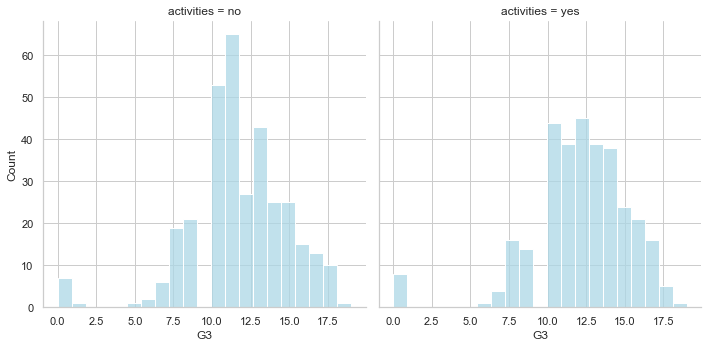

In [15]:
sns.displot(data,x='G3', col='activities',color='lightblue')
Calcolo_Media('activities')

La variabile *dummy* 'activities' che denota l'aver preso o meno parte ad un corso extra-curricolare, non risulta particolarmente significativa in sede di determinazione del voto finale degli studenti. Sebbene il valore espresso dalla media risulti più elevato di 0,40 punti, il dato risulta trascurabile alla luce del maggior numero di unità che caratterizzano il sottocampione di studenti che non ha svolto alcuna attività extra.

### Intenet è davvero uno strumento in grado di migliorare le performance accademiche?

La feature 'internet', in corrispondenza della categoria no, consta di un numero totale di studenti pari a 151 unità con una media che ammonta a 11.03.
La feature 'internet', in corrispondenza della categoria yes, consta di un numero totale di studenti pari a 498 unità con una media che ammonta a 12.17.


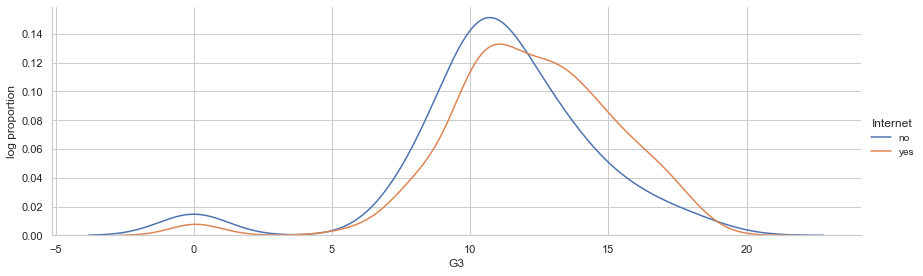

In [16]:
Calcolo_Media('internet')
g = sns.FacetGrid(data = data, hue="internet", aspect=3, height=4) #
g.map(sns.kdeplot,'G3')
g.add_legend(title="Internet",fontsize=10)
g.set_xlabels("G3")
g.set_ylabels("log proportion")

La presenza di una connessione internet in casa non sembra essere elemento discriminatorio nella determinazione del voto accademico finale. Le distribuzioni risultano molto simili tra loro, evidenziando uno scostamento nelle medie trascurabile alla luce del maggior numero di studenti che possiedono la linea internet, il cui sottocampione accoglie più del triplo delle unità campionarie rispetto ai soggetti non dotati di connessione ad internet. 


Sarebbe interessante approfondire tale relazione tra le variabili potendo fare affidamento su un campione più elevato e eguale in termini di dimensionamento delle sue classi, il quale consentirebbe di pervenire a risultati più rappresentativi ed affidabili. Il risultato non sarebbe scontato: ricordiamo che internet è un potente strumento il quale se da un lato consente di ottenere l'accesso a qualsiasi tipo di informazione (agevolando ed incrementando le performance scolastiche) dall'altro rappresenta una possibile fonte di disturbo (si pensi all'utilizzo dei social o alle piattaforme di intrattenimento come youtube o twitch) tale da favorire un peggioramento dei risultati scolastici.   

### L'area geografica di appartenenza incide sulle performance accademiche?

La variabile 'address' cattura il luogo di residenza degli studenti effettuando una distinzione tra aree urbane e rurali: tale variabile si configura come una dummy che assume i valori 'U' nel primo caso e 'R' nel secondo.
Di seguito si cercherà di comprendere l'eventuale rilevanza che l'area geografica riveste con riferimento alle performance scolastiche; 

In [17]:
Calcolo_Media('address')

La feature 'address', in corrispondenza della categoria R, consta di un numero totale di studenti pari a 197 unità con una media che ammonta a 11.09.
La feature 'address', in corrispondenza della categoria U, consta di un numero totale di studenti pari a 452 unità con una media che ammonta a 12.26.


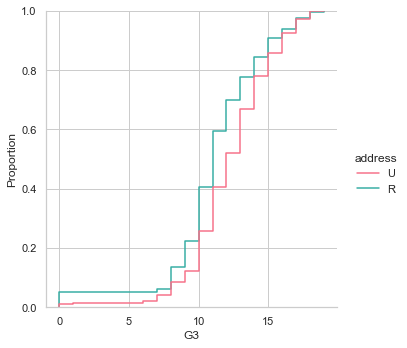

In [18]:
sns.displot(data, x="G3", hue="address",kind='ecdf',palette='husl')
sns.set_theme(style="whitegrid")

Il grafico non mostra particolari differenze in merito alle prestazioni scolastiche tra studenti che vivono in aree geografiche diverse, evidenziando la bassa rilevanza che la varibile riveste sul voto finale.

<AxesSubplot:>

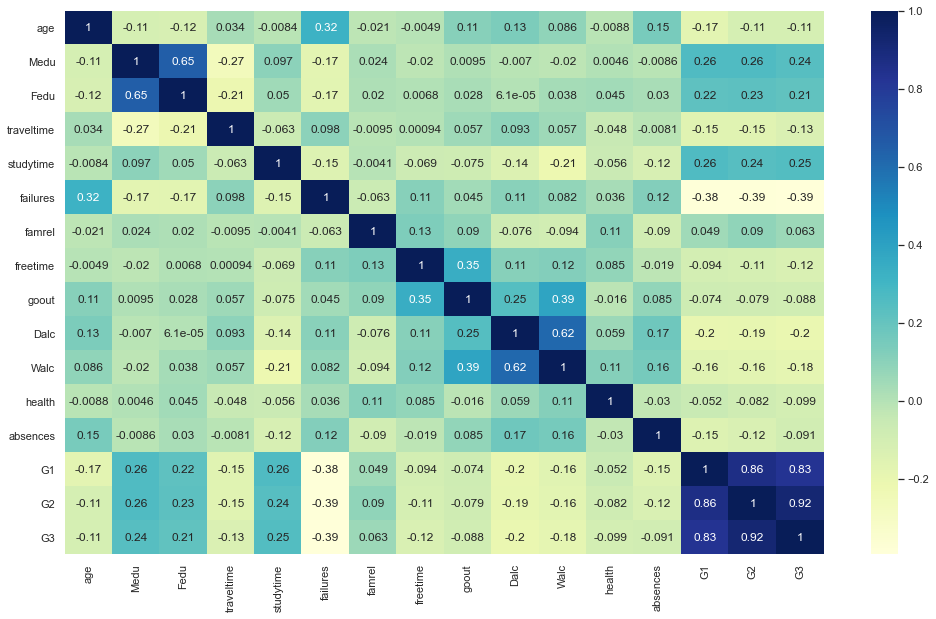

In [19]:
#valutiamo la correlazione tra le variabili numeriche che si ritengono più rilevanti
data=data.drop(['Fedu_level','Medu_level'],axis=1) # tralasciamo le varibili 'Fedu_level'e'Medu_level'
sns.set(rc={'figure.figsize':(17,10)})
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

La rappresentazione grafica cui sopra, nota come mappa di calore o 'heatmap', individua la correlazione presente tra le variabili considerate, all'interno della matrice, espressa dal **coefficiente di Pearson**. Una gradazione di colore più elevata identifica un maggior valore dell'indice di correlazione esistente tra le variabili prese a riferimento.
Dal grafico risultano interessanti informazioni, alcune delle quali confermano le aspettative addotte in precedenza:
- come già evidenziato le variabili indicative del livello di istruzione materno e paterno (rispettivamente Medu e Fedu) esibiscono un buon grado di correlazione con la *feature* G3 rivelando un coefficiente di Pearson pari a 0,24 e 0,21;
- non sorprende il dato relativo al tempo di studio (studytime), il cui coefficiente di correlazione di Pearson -pari a 0,25- evidenzia l'importanza  del tempo dedicato all'attività didattica ai fini di una migliore performance accademica;
- l'età sembrerebbe non rivestire un ruolo centrale nella determinazione del voto, mostrando la presenza di una correlazione negativa rispetto a quest'ultimo: maggiore è l'età dello studente peggiore è la sua votazione scolastica. Tale dato, risulta interessante in quanto potrebbe dipendere da una serie di fattori legati ad esempio all'aumento del livello di difficoltà degli esami fronteggiati (si pensi ai test di tipo universitario) ecc..;
- come ci si poteva aspettare le variabili che catturano l'utilizzo di alcolici hanno un incidenza negativa sulle performance dello studente alterandone lo stato psicofisico ed inficiandone, nel lungo termine, le prestazioni scolastiche;
- la *feature* failures presenta un'elevato livello di correlazione negativa con il voto finale evidenziando come studenti che abbiano fallito il superamento di una o più materie in passato tendano a perseguire un livello di voto mediocre;
- sorprendentemente il numero di assenze scolastiche non sembra avere una particolare incidenza su G3, evidenziando un valore del coefficiente di Pearson negativo pari allo -0,091;

# Codifica One hot <a id='onehot'></a>

Di seguito si procederà effettuando la codifica One hot sui dati di tipo categorico, manipolandoli e nel concreto creando una nuova colonna per ogni possibile valore che ogni variabile categorica può assumere.

In [20]:
new_data=pd.get_dummies(data, drop_first=True)
new_data.tail()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes
644,19,2,3,1,3,1,5,4,2,1,...,0,0,1,0,0,0,0,1,1,1
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,0,1,0,0,1,1
646,18,1,1,2,2,0,1,1,1,1,...,0,0,1,0,0,0,0,1,1,0
647,17,3,1,2,1,0,2,4,5,3,...,0,0,1,0,0,0,0,0,1,1
648,18,3,2,3,1,0,4,4,1,3,...,0,0,1,0,0,0,0,0,1,1


# Machine Learning <a id='ML'></a>

Tale step consta delle seguenti fasi:
- Separazione delle features dalla variabile target;
- Divisione del dataset in test e training set;
- Scelta dei modelli;
- Validazione deii parametri e degli iper-parametri;
- Predizioni;
- Rappresentazione grafica dei risultati valutando la bontà del modello del migliore modello;

## Preprocessing dei dati <a id='Preprocessing'></a>

In questa fase si modificherà il dataset con l'intento di renderlo idoneo alla successiva modellizzazione.

In [21]:
y = new_data.G3 #separiamo la variabile dipendente ed assegnamola all'array y
X = new_data.drop(['G3'],axis=1) # consideriamo il dataframe al netto della variabile target e rinominialo X

X.head() # controlliamo che l'operazione sia avvenuta con successo

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,0,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,0,1,0,0,1,1
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,1,0,0,0,1,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,1,0,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,0,0,1,0,0,1,0


In [22]:
#suddividiamo i dati in train e test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X.shape)
print(X_train.shape)
print(y_test.shape)

(649, 31)
(454, 31)
(195,)


In [23]:
#scaliamo i dati 
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)
y_train_scaled=scale(y_train)
y_test_scaled=scale(y_test)

## Scelta dei modelli di regressione  <a id='Scelta'></a>

Il problema che si sta affrontando si oggettizza in un problema di regressione; In tal senso, ai fini della sua risoluzione, si è fatto ricorso ai seguenti modelli:
- Random Forest;
- KNN;
- SVR;
- Gradient Tree Boosting;

## Modello KNN  <a id='KNN'></a>

Questo algoritmo viene utilizzato sia per la risoluzione di problemi di regressione che di classificazione. Intuitivamente il modello KNN (terminologia anglosassone che definisce il K-Nearest-Neighbors) ha l'obbiettivo di predire i nuovi dati utilizzando la similarità delle *features* come principale mezzo di predizione effettuando un interpolazione dei dati più vicini, ad ognuno dei quali viene assegnato un peso (di default è uniforme per tutti i valori). I principali parametri ed iperparametri cui si compone il modello sono i seguenti:
- **n_neighbors**: paramentro che individua il numero di dati da considerare per pervenire alla previsione del valore *i-esimo*;
- **algoritm**: Metodo utilizzato per la selezione dei nearest neighbors; all'interno del presente notebook si utilizzaranno gli algoritmi 'ball_tree'<span style = font-size:80%>$^{2}$</span> e 'Kd_tree'<span style = font-size:80%>$^{3}$</span>;  
- **K**: iperparametro il cui valore ottimale incide sul *tradeoff*  bias-varianza; un valore di k basso fornisce un adattamento più flessibile del modello riducendone la distorsione a scapito della varianza; al contrario valori più elevati dell'iperparametro forniscono un adattamento meno variabile poichè la previsione in una regione è la media di più punti;
- **leaf_size**: numero dei nodi foglia utilizzati negli algoritmi Kd_tree e Ball_tree;
<br>
<br>    
<span style = font-size:80%>
$^{2}$ L'algoritmo Ball_tree organizza e struttura i dati considerando lo spazio all'interno del quale essi sono localizzati. Operativamente ciò che l'algoritmo fa è suddividere il training set in 2 *cluster*, ogni gruppo è individuato da una sfera caratterizzata da un centro (i dati nello spazio saranno contenuti o in una o nell'altra, non vi saranno situazioni di condivisione delle stesse osservazioni tra le sfere); a questo punto la selezione dei dati avviene in base alla distanza dell'i-esimo dato rispetto al centro; effettuata la selezione dei primi dati si reitera il processo;</span>
<span style = font-size:80%>
<br>
$^{3}$L'algoritmo noto come Kd_tree è un algoritmo di struttura dei dati (appartenente alla categoria degli alberi di ricerca binaria) i quali sono organizzati all'interno di uno spazio k-dimensionale -da cui deriva il nome-; Operativamente tale algoritmo è programmato per suddividere lo spazio in parti differenti, all'interno delle quali ricadranno i training data; tale processo avviene reiterando  le seguenti 3 fasi principali quali selezione casuale di un attributo dal dataset, calcolo del valore mediano (la mediana individerà una linea di confine tale da splittare le osservazioni) suddivisione delle osservazioni; </span>

## Validazione parametri con "Randomized_search_cv" <a id='val'></a>

Per effettuare il *tuning* degli iperparametri si è fatto ricorso alla tecnica di **Random Search** (RS) preferita rispetto alla **Grid Search** (GS). La differenza principale tra i 2 metodi di valutazione è la seguente:
- **Grid Search:** effettua ogni possibile combinazione di una lista di valori forniti in input valutando via via la bontà del modello; il percorso seguito è lineare, simile a quello di un reticolo (grid in inglese da cui deriva il nome della tecnica) dove i risultati sono disposti all'interno di una matrice ed annotati progressivamente; una volta effettuate tutte le possibili combinazioni il modello con il *set* di parametri che restituiscono il miglior *score* è considerato il migliore;

Di seguito è visualizzata la rappresentazione grafica della tecnica **grid search**
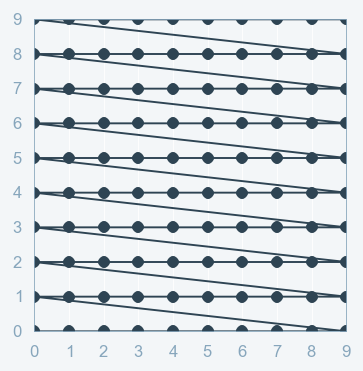

La tecnica di validazione **GS** (valutando ogni possibile combinazione dello spazio dei parametri) seppur è in grado di pervinere all'ottimo ricercato, risulta 'costosa' dal punto di vista computazionale impiegando un lasso di tempo proporzionale al numero totale di parametri e iperparametri da validare.

- **Random Search:** è una tecnica che combina casualmente l'insieme dei valori forniti, con l'intento di pervenire al miglior modello possibile. Ciò implica che non tutti i valori dei parametri vengano presi a riferimento ma verranno campionati con numeri fissi di iterazioni forniti dal valore assegnati ad 'n_iter'.

Di seguito è visualizzata la rappresentazione grafica della tecnica **random search**
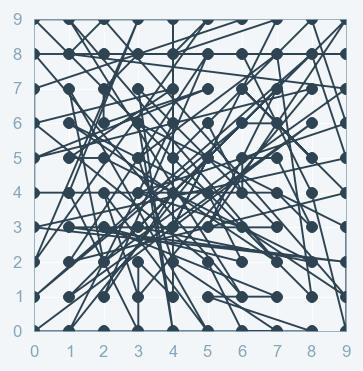

Il metodo **RS** seppur si avvale di un approccio inefficiente nella ricerca dell'ottimo all'interno dello spazio dei parametri, è stato dimostrato (dagli autori Bergstra e Bengio) che è in grado di pervenire ad un risultato in media simile a quello che si raggiungerebbe qualora si utilizzasse la Grid Search.  

In [24]:
# costruiamo il dizionario contenente i principali parametri ed iperparamentri che saranno utilizzati all'interno della funzione random_search_CV
params = {'n_neighbors': np.arange(3,30,1).tolist(),
              'algorithm': ['ball_tree', 'kd_tree'],
              'leaf_size': np.arange(1,40).tolist()
             }  

In [25]:
KNN_model = RandomizedSearchCV(KNeighborsRegressor(),params,scoring='neg_mean_absolute_error',n_jobs=-1)
KNN_model.fit(X_train_scaled,y_train_scaled)

RandomizedSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15, 16,
                                                        17, 18, 19, 20, 21, 22,
                                                        23, 24, 25, 26, 27, 28,
                                                        29]},
                   scoring='neg_mean_absolute_error')

In [26]:
result=dict(KNN_model.cv_results_)  # trasformo il dataframe pandas in un dizionario dal quale attingere i dati necessari da inserire nella tabella di seguito

i=0 #inizializzo l'indice i
  
# definisco la tabella che andrò ad ottenere in output
myTable = PrettyTable(field_names=["N_neighbor", "Algorithm", "Leaf size", "Mean test score","Rank test score"],header_style='upper',sortby='Mean test score',float_format='.03')
# utillizzo un loop while che mi permette di visualizzare le prime righe dei dati ai quali sono interessato filtrati rispetto al mean_test_score
while i<=9:
    myTable.add_row([result['param_n_neighbors'][i], result['param_algorithm'][i],result['param_leaf_size'][i],result['mean_test_score'][i],result['rank_test_score'][i]])
    i=i+1
    continue
print(myTable)

+------------+-----------+-----------+-----------------+-----------------+
| N_NEIGHBOR | ALGORITHM | LEAF SIZE | MEAN TEST SCORE | RANK TEST SCORE |
+------------+-----------+-----------+-----------------+-----------------+
|     6      | ball_tree |     11    |      -0.476     |        10       |
|     28     | ball_tree |     26    |      -0.473     |        9        |
|     23     |  kd_tree  |     19    |      -0.471     |        8        |
|     18     |  kd_tree  |     10    |      -0.466     |        7        |
|     17     |  kd_tree  |     35    |      -0.464     |        6        |
|     11     |  kd_tree  |     19    |      -0.457     |        4        |
|     11     |  kd_tree  |     30    |      -0.457     |        4        |
|     13     | ball_tree |     18    |      -0.456     |        3        |
|     10     | ball_tree |     7     |      -0.454     |        1        |
|     10     | ball_tree |     30    |      -0.454     |        1        |
+------------+-----------

In [27]:
print(f'I parametri utilizzati per pervenire al miglior modello sono i seguenti: \n\n {KNN_model.best_params_}')

I parametri utilizzati per pervenire al miglior modello sono i seguenti: 

 {'n_neighbors': 10, 'leaf_size': 30, 'algorithm': 'ball_tree'}


L'errore medio assoluto (MAE) calcolato sul training set per il modello SVR in corrispondenza dei parametri ottimali è pari a: 0,454.

In [28]:
#Valutiamo il modello sul test set
KNN_predictions = KNN_model.predict(X_test_scaled)
MAE_KNN=round(mean_absolute_error(y_test_scaled,KNN_predictions),3) #variabile che individua il MAE arrotondato alla terza cifra decimale
r2_KNN=(round(r2_score(y_test_scaled,KNN_predictions)*100,2))#variabile che individua il coefficiente di determinazione arrotondato alla terza cifra decimale
print('Il coefficiente di determinazione ammonta a : {}%.'.format(r2_KNN))
print("L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: {}.".format(MAE_KNN))

Il coefficiente di determinazione ammonta a : 58.37%.
L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: 0.463.


In [29]:
#creo la lista temp all'interno della quale inserisco il mean absolute error dei modelli che si andranno a considerare
temp=[]
temp.append(MAE_KNN)

## Modello SVR <a id='SVR'></a>

Il modello SVR è un modello di apprendimento automatico supervisionato utilizzato per effettuare regressioni. Obiettivo del modello è quello di “allargare” lo spazio delle feature, usando funzioni di dimensionalità elevata dei predittori e dei termini di interazione determinando l'iperpiano  per descrivere soglie di separazione non lineari tra le classi.
I principali parametri ed iper-parametri cui si compone sono i seguenti:

- **C:** iper-parametro di regolarizzazione che individua la penalità conferita ad ogni dato che ricade all'esterno dei margini di larghezza $\epsilon$. Un incremento di C consente di aumentare il fit dei training data a scapito della robustezza del modello, incorrendo in fenomeni di overfitting dei dati;
- **epsilon:**  iper-parametro che definisce la soglia dell'errore accettabile; in altre parole può essere considerato come il 'confine', costruito sulla funzione stimata, all'interno del quale non è assegnata alcuna penalità per punti che vi ricadono all'interno;
- **degree:** parametro valido solo per la funzione polinomiale che indica il grado applicato sulla funzione Kernel;
- **gamma:** iperametro utilizzato sulla funzione kernel di tipo gaussiano che definisce l'ampiezza della curvatura del vincolo decisionale sui dati; valori bassi di gamma indicano un ampio raggio di somiglianza che ingloba un numero maggiore di training data, mentre valori di gamma elevati comportano un minor grado di curvatura (modelli con valori di gamma molto grandi tendono a generare fenomeni di overfitting).
-**kernel:** funzione che consente di mappare i dati considerati trasformandoli in una rappresentazione vettoriale delle caratteristiche, effettuata in uno spazio dimensionale superiore in modo da ottenere la "separabilità lineare" dei punti in accordo alle informazioni fornite in input.

## Validazione parametri con "Randomized_search_cv" <a id='val1'></a>

In [30]:
# settiamo il valore dei parametri ed iper-parametri scalando i valori utilizzando il logaritmo  base 10
C_range = np.logspace(-1, 2, 13)
gamma_range = np.logspace(-4,2,7)
degree_range = np.arange(2,4)
epsilon_range = np.logspace(-1, 2, 13)

In [31]:
C_range #plottiamo i valori di C

array([  0.1       ,   0.17782794,   0.31622777,   0.56234133,
         1.        ,   1.77827941,   3.16227766,   5.62341325,
        10.        ,  17.7827941 ,  31.6227766 ,  56.23413252,
       100.        ])

In [32]:
# costruiamo il dizionario contenente i principali parametri ed iperparamentri che saranno utilizzati all'interno della funzione Grid_search_CV

params = [{'kernel' : ['linear'], 'C' : C_range,'epsilon':epsilon_range},
              {'kernel' : ['rbf'], 'C' : C_range, 'gamma': gamma_range,'epsilon':epsilon_range},
              {'kernel' : ['poly'], 'C' : C_range, 'degree' : degree_range,'epsilon':epsilon_range}
             ]

In [33]:
SVR_model = RandomizedSearchCV(SVR(),params,scoring='neg_mean_absolute_error',n_jobs=-1)
SVR_model.fit(X_train_scaled,y_train_scaled)

RandomizedSearchCV(estimator=SVR(), n_jobs=-1,
                   param_distributions=[{'C': array([  0.1       ,   0.17782794,   0.31622777,   0.56234133,
         1.        ,   1.77827941,   3.16227766,   5.62341325,
        10.        ,  17.7827941 ,  31.6227766 ,  56.23413252,
       100.        ]),
                                         'epsilon': array([  0.1       ,   0.17782794,   0.31622777,   0.56234133,
         1.        ,   1.77827941,   3.16227766,   5.62341325,
        10.        ,  17.7827941 ,  31.6227766 ,  56.23413252,
       100.        ]),
                                         'kernel': ['linear']...
                                         'kernel': ['rbf']},
                                        {'C': array([  0.1       ,   0.17782794,   0.31622777,   0.56234133,
         1.        ,   1.77827941,   3.16227766,   5.62341325,
        10.        ,  17.7827941 ,  31.6227766 ,  56.23413252,
       100.        ]),
                                         'degre

In [34]:
result=dict(SVR_model.cv_results_)  # trasformo il dataframe pandas in un dizionario dal quale attingere i dati necessari da inserire nella tabella di seguito

i=0 #inizializzo l'indice i
  
# definisco la tabella che andrò ad ottenere in output
myTable = PrettyTable(field_names=["Kernel", "gamma", "epsilon", "C","Mean test score","Rank test score"],header_style='upper',sortby='Mean test score',float_format='.03')
# utillizzo un loop while che mi permette di visualizzare le prime righe dei dati ai quali sono interessato filtrati rispetto al mean_test_score
while i<=9:
    myTable.add_row([result['param_kernel'][i],result['param_gamma'][i],result['param_epsilon'][i],result['param_C'][i], result['mean_test_score'][i],result['rank_test_score'][i]])
    i=i+1
    continue
print(myTable)

+--------+---------+---------+---------+-----------------+-----------------+
| KERNEL |  GAMMA  | EPSILON |    C    | MEAN TEST SCORE | RANK TEST SCORE |
+--------+---------+---------+---------+-----------------+-----------------+
|  rbf   |  0.100  |  10.000 |  0.100  |      -1.012     |        9        |
|  rbf   |  10.000 |  3.162  |  31.623 |      -1.012     |        9        |
|  rbf   |  0.000  | 100.000 |  5.623  |      -1.012     |        7        |
|  rbf   |  0.100  | 100.000 |  17.783 |      -1.012     |        7        |
|  rbf   |  10.000 |  0.100  | 100.000 |      -0.754     |        6        |
|  rbf   | 100.000 |  0.562  |  0.178  |      -0.750     |        5        |
|  poly  |    --   |  0.178  |  0.100  |      -0.693     |        4        |
|  rbf   |  0.100  |  0.316  |  10.000 |      -0.513     |        3        |
|  poly  |    --   |  0.562  |  1.000  |      -0.451     |        2        |
|  rbf   |  0.010  |  0.316  |  17.783 |      -0.320     |        1        |

In [35]:
print(f'I parametri utilizzati per pervenire al miglior modello sono i seguenti: \n\n {SVR_model.best_params_}')

I parametri utilizzati per pervenire al miglior modello sono i seguenti: 

 {'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.31622776601683794, 'C': 17.78279410038923}


L'errore medio assoluto (MAE) calcolato sul training set per il modello SVR in corrispondenza dei parametri ottimali è pari a: 0,261.

In [36]:
#Valutiamo il modello sul test set
svr_predictions = SVR_model.predict(X_test_scaled)
MAE_SVR=round(mean_absolute_error(y_test_scaled,svr_predictions),3) #variabile che individua il MAE arrotondato alla terza cifra decimale
r2_SVR=(round(r2_score(y_test_scaled,svr_predictions)*100,2)) #variabile che individua il coefficiente di determinazione arrotondato alla terza cifra decimale
print('Il coefficiente di determinazione ammonta a : {}%.'.format(r2_SVR))
print("L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: {}.".format(MAE_SVR))

Il coefficiente di determinazione ammonta a : 81.46%.
L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: 0.293.


In [37]:
temp.append(MAE_SVR) #aggiorno la lista con i risultati del modello SVR

## Random Forest <a id='RF'></a>

Il modello Random Forest è uno dei principali modelli di bagging utilizzato sia per la risoluzione di problemi di classificazione che di regressione. Il suo nome deriva dal metodo utilizzato dall'algoritmo per effettuare previsioni: considerato un certo dataset il modello seleziona casualmente alcune delle variabili indipendenti (*features*) creando un insieme di alberi decisionali con l'obbiettivo di generare una 'foresta' di alberi scarsamente correlati tra loro il cui grado di predizione risulti maggiore di quello che si avrebbe considerando individualmente ogni albero che lo caratterizza. Intituitivamente tale modello parte da alberi ad alta varianza, combinandoli tra loro; il risultato è un ensemble caratterizzato da un piccolo aumento in bias bilanciato da una rilevante riduzione in termini di varianza.
I principali parametri cui il Random Forest si compone e dei quali ci avvarremo all'interno del presente notebook sono i seguenti (si ricordi che IL grado di correlazione delle predizioni dipenderà anche dai parametri che si forniranno in input):
- n_estimators: parametro di efficienza che definisce il numero di alberi decisionali cui si comporrà la foresta;
- max_features: rappresenta l'iperpametro principale del modello, il quale definisce la profondità dell'albero, determinando il livello di *bias* che si è disposti a tollerare in virtù del numero di variabili indipendenti che caratterizzeranno l'ensemble ad alta varianza (difatti selezionare solo alcune *feature* comporta un certo grado di distorsione nell'analisi); maggiore è il suo valore minore risulterà la varianza dell'ensemble a scapito tuttavia di un maggiore livello di *bias*;
- min_samples_leaf: iperparametro che definisce il numero minimo di campioni da considerare prima di giungere al leaf node (cioè il nodo terminale);



## Validazione parametri con "Randomized_search_cv" <a id='val2'></a>

In [38]:
# settiamo il valore dei parametri ed iper-parametri
n_estimators=[20,30,50,80,100,200]
max_features=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] #considero un valore pari alla metà del totale delle features

In [39]:
# costruiamo il dizionario contenente i principali parametri ed iperparamentri che saranno utilizzati all'interno della funzione Grid_search_CV

params = [{'n_estimators' : n_estimators, 'max_features' : max_features}]

In [40]:
RF_model = RandomizedSearchCV(RandomForestRegressor(random_state=1),params,scoring='neg_mean_absolute_error',n_jobs=-1)
RF_model.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
                   param_distributions=[{'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16],
                                         'n_estimators': [20, 30, 50, 80, 100,
                                                          200]}],
                   scoring='neg_mean_absolute_error')

In [41]:
result=dict(RF_model.cv_results_) # trasformo il dataframe pandas in un dizionario dal quale attingere i dati necessari da inserire nella tabella di seguito

i=0 #inizializzo l'indice i
  
# definisco la tabella che andrò ad ottenere in output
myTable = PrettyTable(field_names=["n estimator", "max features","Mean test score","Rank test score"],header_style='upper',sortby='Mean test score',float_format='.03')
# utillizzo un loop while che mi permette di visualizzare le prime righe dei dati ai quali sono interessato filtrati rispetto al mean_test_score
while i<=9:
    myTable.add_row([result['param_n_estimators'][i],result['param_max_features'][i], result['mean_test_score'][i],result['rank_test_score'][i]])
    i=i+1
    continue
print(myTable)

+-------------+--------------+-----------------+-----------------+
| N ESTIMATOR | MAX FEATURES | MEAN TEST SCORE | RANK TEST SCORE |
+-------------+--------------+-----------------+-----------------+
|      50     |      2       |      -1.252     |        10       |
|      30     |      2       |      -1.250     |        9        |
|      50     |      3       |      -1.123     |        8        |
|      50     |      5       |      -0.985     |        7        |
|     100     |      6       |      -0.934     |        6        |
|      50     |      9       |      -0.873     |        5        |
|      20     |      12      |      -0.864     |        4        |
|     100     |      9       |      -0.860     |        3        |
|     200     |      15      |      -0.840     |        2        |
|     100     |      15      |      -0.839     |        1        |
+-------------+--------------+-----------------+-----------------+


In [42]:
print(f'I parametri utilizzati per pervenire al miglior modello sono i seguenti: \n\n {RF_model.best_params_}')

I parametri utilizzati per pervenire al miglior modello sono i seguenti: 

 {'n_estimators': 100, 'max_features': 15}


L'errore medio assoluto (MAE) calcolato sul training set per il modello Random Forest in corrispondenza dei parametri ottimali è pari a: 0,833.

In [43]:
#Valutiamo il modello sul test set
RF_predictions = RF_model.predict(X_test)

MAE_RF=round(mean_absolute_error(y_test,RF_predictions),3) #variabile che individua il MAE arrotondato alla terza cifra decimale
r2_RF=(round(r2_score(y_test,RF_predictions)*100,2))#variabile che individua il coefficiente di determinazione arrotondato alla terza cifra decimale
print('Il coefficiente di determinazione ammonta a : {}%.'.format(r2_RF))
print("L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: {}.".format(MAE_RF))

Il coefficiente di determinazione ammonta a : 87.54%.
L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: 0.743.


In [44]:
temp.append(MAE_RF) #aggiorno a lista con i risultati del modello Random Forest

## Gradient Boosting <a id='GB'></a>

Il Gradient Boosting è una implementazione dell'algoritmo di Boosting <span style = font-size:80%>$^{4}$</span>, dal quale eredita la logica di costruzione di uno Strong Learner.  I modelli di cui si avvale sono, generalmente, alberi decisionali i quali combinati tra loro consentono di perseguire lo scopo del modello, cioè quello di minimizzare una generica funzione di costo differenziabile.
I parametri e gli iperparametri cui si caratterizza sono i seguenti:
- n_estimators : parametro di efficienza che definisce il numero di modelli da considerare.
- max_depth : iperparametro che limita il numero di nodi massimo che caratterizzano ogni albero decisionale.
- min_samples_split : iperparametro che rappresenta il numero minimo di osservazioni richieste prima di procedere allo split di un nodo interno.
- learning_rate : parametro che assegna un peso ad ogni albero decisionale contenuto nel Gradient boosting (tale valore può essere cosiderato come una costante moltiplicativa, utile per evitare fenomeni di overfitting dei dati).
- loss : funzione di costo da ottimizzare; https://scikit-learn.org/stable/modules/ensemble.html
<br>
<br>    
<span style = font-size:80%>
$^{4}$ Con Boosting si fa riferimento ad un algoritmo iterativo che detta le linee guida sul come collegare tra loro un insieme di Weak Learner per creare uno Strong Learner: la costruzione iterativa di modelli ad alta abilità predittiva avviene partendo da modelli  più 'semplici' che ad ogni step consentono di perfezionare la performance di stima apprendendo dai risultati ottenuti dai suoi predecessori. In fase di previsione il risultato dello Strong Learner finale sarà la somma dei risultati dei Weak Learner in esso contenuti. </span>

## Validazione parametri con "Randomized_search_cv" <a id='val3'></a>

In [45]:
# settiamo il valore dei parametri ed iper-parametri
params = {"n_estimators": [20,30,50,80,100,200],
          "max_depth": [2,3,4,5],
          "learning_rate": np.linspace(0.02,0.12,10).tolist(),
          'loss': ['ls', 'lad', 'huber'],
         }

In [46]:
GB_model = RandomizedSearchCV(ensemble.GradientBoostingRegressor(),params,scoring='neg_mean_absolute_error',n_jobs=-1)
GB_model.fit(X_train_scaled,y_train_scaled)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.02,
                                                          0.03111111111111111,
                                                          0.04222222222222222,
                                                          0.05333333333333333,
                                                          0.06444444444444444,
                                                          0.07555555555555556,
                                                          0.08666666666666666,
                                                          0.09777777777777777,
                                                          0.10888888888888888,
                                                          0.12],
                                        'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 4, 5],
                               

In [47]:
result=dict(GB_model.cv_results_) # trasformo il dataframe pandas in un dizionario dal quale attingere i dati necessari da inserire nella tabella di seguito
i=0 #inizializzo l'indice i
  
# definisco la tabella che andrò ad ottenere in output
myTable = PrettyTable(field_names=["n estimators", "max depth","learning rate","loss","mean test score","rank test score"],header_style='upper',sortby='mean test score',float_format='.03')
# utillizzo un loop while che mi permette di visualizzare le prime righe dei dati ai quali sono interessato filtrati rispetto al mean_test_score
while i<=9:
    myTable.add_row([result['param_n_estimators'][i],result['param_max_depth'][i],result['param_learning_rate'][i], result['param_loss'][i],result['mean_test_score'][i],result['rank_test_score'][i]])
    i=i+1
    continue
print(myTable)

+--------------+-----------+---------------+-------+-----------------+-----------------+
| N ESTIMATORS | MAX DEPTH | LEARNING RATE |  LOSS | MEAN TEST SCORE | RANK TEST SCORE |
+--------------+-----------+---------------+-------+-----------------+-----------------+
|      20      |     3     |     0.031     | huber |      -0.460     |        10       |
|      30      |     3     |     0.031     |   ls  |      -0.372     |        9        |
|      20      |     4     |     0.087     |  lad  |      -0.337     |        8        |
|     100      |     4     |     0.020     |  lad  |      -0.322     |        7        |
|     200      |     5     |     0.053     | huber |      -0.282     |        6        |
|     100      |     4     |     0.020     |   ls  |      -0.282     |        5        |
|     200      |     4     |     0.020     |  lad  |      -0.278     |        4        |
|     200      |     4     |     0.087     | huber |      -0.274     |        3        |
|      50      |     

In [48]:
print(f'I parametri utilizzati per pervenire al miglior modello sono i seguenti: \n\n {GB_model.best_params_}')

I parametri utilizzati per pervenire al miglior modello sono i seguenti: 

 {'n_estimators': 100, 'max_depth': 2, 'loss': 'huber', 'learning_rate': 0.06444444444444444}


L'errore medio assoluto (MAE) calcolato sul training set per il modello Gradient Boosting in corrispondenza dei parametri ottimali è pari a: 0,255.

In [49]:
#Valutiamo il modello sul test set
GB_predictions = GB_model.predict(X_test_scaled)

MAE_GB=round(mean_absolute_error(y_test_scaled,GB_predictions),3) #variabile che individua il MAE arrotondato alla terza cifra decimale
r2_GB=(round(r2_score(y_test_scaled,GB_predictions)*100,2)) #variabile che individua il coefficiente di determinazione arrotondato alla terza cifra decimale
print('Il coefficiente di determinazione ammonta a : {} %.'.format(r2_GB))
print("L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: {}.".format(MAE_GB))

Il coefficiente di determinazione ammonta a : 85.9 %.
L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: 0.227.


In [50]:
temp.append(MAE_GB) #aggiorno a lista con i risultati del modello Gradient Boosting

## Sintesi dei risultati <a id='sintesi'></a>

Nel paragrafo che segue si fornisce una sintesi dei risultati (espressa in forma tabellare) al quale si è pervenuti avvalendoci dei modelli utilizzati. 

In [51]:
# definisco la tabella recap per sintetizzare i risultati ottenuti
recap = PrettyTable(field_names=["modello", "mae (test set)","mae (training set)","R2(%)"],header_style='upper')
recap.add_row(["KNN",temp[0],"0,454",r2_KNN])
recap.add_row(["SVR",temp[1],"0,320",r2_SVR])
recap.add_row(["Random Forest",temp[2],"0,839",r2_RF])
recap.add_row(["Gradient Boosting",temp[3],"0,249",r2_GB])
print(recap)

+-------------------+----------------+--------------------+-------+
|      MODELLO      | MAE (TEST SET) | MAE (TRAINING SET) | R2(%) |
+-------------------+----------------+--------------------+-------+
|        KNN        |     0.463      |       0,454        | 58.37 |
|        SVR        |     0.293      |       0,320        | 81.46 |
|   Random Forest   |     0.743      |       0,839        | 87.54 |
| Gradient Boosting |     0.227      |       0,249        |  85.9 |
+-------------------+----------------+--------------------+-------+


Alla luce dei risultati contenuti all'interno della tabella di cui sopra, si può affermare che il modello Gradient Boosting presenti la migliore abilità predittiva con riferimento alla variabile dipendente, qual è il voto finale per il corso di porteghese; ciò  in virtù sia del minor valore espresso dalla metrica MAE, la quale esibisce i valori più bassi per il training set ed il test set (pari nello specifico a: 0,249 e 0,227), sia in considerazione del coefficiente di determinazione il cui valore definisce la percentuale di variabilità che il modello riesce a 'spiegare'.

## Rappresentazione grafica del miglior modello <a id='grafico'></a>

Di seguito si è plottato il grafico al quale si è pervenuti considerando il miglior modello ottenuto.

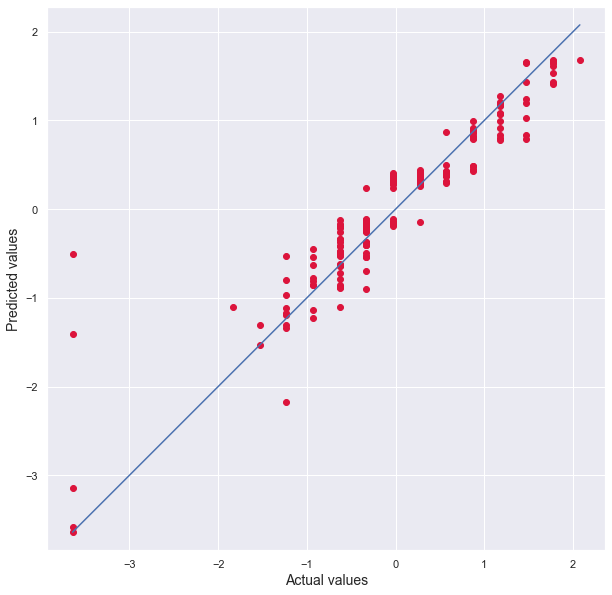

In [52]:
#rappresentazione grafica

plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled,GB_predictions, c='crimson')
p1 = max(max(GB_predictions), max(y_test_scaled))
p2 = min(min(GB_predictions), min(y_test_scaled))
plt.plot([p1,p2], [p1,p2], 'b-')
plt.xlabel('Actual values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.axis('equal')
plt.show()

Come già riscontrabile dall'analisi del valore del coefficiente di determinazione è possibile affermare che il modello Gradient Boosting presenta un alto grado di 'fitting' dei dati, evidenziando un elevato grado di abilità in fase di predizione del voto finale conseguito nel corso di portoghese ottenuto dagli studenti. Il modello di regressione risulta particolarmente 'performante', riuscendo a spiegare circa l'86% della variabilità che contraddistingue il fenomeno analizzato.

## Importanza delle features <a id='features'></a>

Di seguito si considererà il miglior modello al quale si è pervenuti (ovvero il Gradient boosting) effettuando una valutazione in merito all'importanza delle *features* che lo caratterizzano, con l'obiettivo di perseguire lo scopo che ci si era prefissati.  

Feature: guardian_other, Score: 0.00001
Feature: higher_yes, Score: 0.00011
Feature: activities_yes, Score: 0.00020
Feature: Pstatus_T, Score: 0.00040
Feature: paid_yes, Score: 0.00051
Feature: famsup_yes, Score: 0.00061
Feature: failures, Score: 0.00062
Feature: internet_yes, Score: 0.00064
Feature: reason_reputation, Score: 0.00064
Feature: reason_home, Score: 0.00066
Feature: traveltime, Score: 0.00067
Feature: school_MS, Score: 0.00074
Feature: schoolsup_yes, Score: 0.00076
Feature: Dalc, Score: 0.00082
Feature: guardian_mother, Score: 0.00099
Feature: health, Score: 0.00119
Feature: address_U, Score: 0.00126
Feature: sex_M, Score: 0.00147
Feature: reason_other, Score: 0.00173
Feature: famrel, Score: 0.00174
Feature: freetime, Score: 0.00185
Feature: studytime, Score: 0.00196
Feature: Walc, Score: 0.00224
Feature: Fedu, Score: 0.00307
Feature: famsize_LE3, Score: 0.00337
Feature: absences, Score: 0.00388
Feature: Medu, Score: 0.00486
Feature: goout, Score: 0.00541
Feature: age, Sco

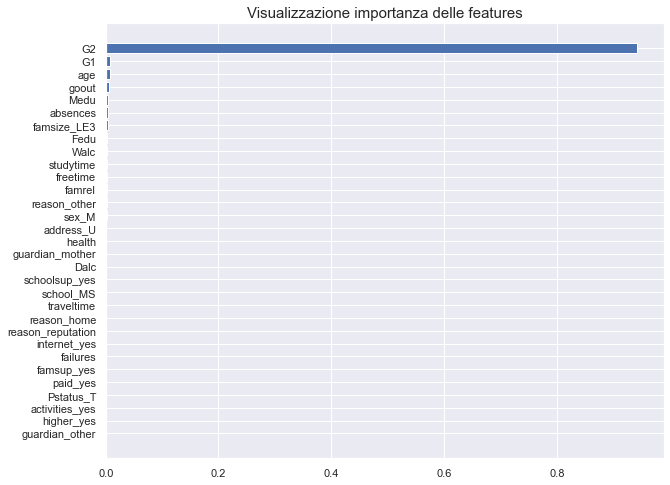

In [53]:
# visualizzo la features importance del modello 
model = ensemble.GradientBoostingRegressor(loss='huber', max_depth=5, learning_rate=  0.053, n_estimators= 100)  # Copio il modello che ha ottenuto i risulati migliori
model.fit(X_test_scaled, y_test_scaled)
feature_importance = model.feature_importances_   # Ricavo il peso percentuale delle features
sorted_idx = model.feature_importances_.argsort()  # Ottengo l'ordine dal più basso al più alto

for i in sorted_idx:  # Stampo il valore delle features
    print('Feature: {}, Score: {:.5f}' .format(X.columns[i],  model.feature_importances_[i]))


fig, axes = plt.subplots(figsize=(10,8), sharey= False)
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx] ) 
plt.title ("Visualizzazione importanza delle features", size = 15);

Dal grafico è possibile osservare come la variabile G2 assuma un peso preponderante nella determinazione del voto finale per il corso di portoghese annullando quasi totalmente le altre *features*  presenti nel dataset.
Considerato quello che è l'obiettivo prefissato all'inizio, ovvero quello di stabilire quali siano i principali fattori che incidono sul voto finale conseguito dagli studenti, si procederà eliminando le variabili G1 e G2 le quali rappresentano (come avviene per il voto finale) il riflesso dei fattori personali, sociali e famigliari degli studenti.

## Riaddestramento modello <a id='riaddestramento'></a>

Nel seguito, come anticipato, si andrà a riaddestrare il modello Gradient Boosting utilizzando i migliori parametri ed iperparametri cui siamo pervenuti, andando tuttavia ad eliminare le variabili G1 e G2 ponendo, in tal modo, particolare enfasi sugli altri fattori che incidono sulla variabile dipendente.
In tal sede, ovviamente, ci aspettiamo un significativo calo circa la bontà del modello (ravvisabile nel minore valore del coefficiente di determinazione ed in un maggiore scarto tra valori osservati e predetti) considerato il peso che le variabili succitate rivestono per la comprensione del fenomeno indagato.  

In [54]:
#rimuovo le colonne 13 e 14 che corrispondono alle variabili G1 e G2
new_X_train = np.delete(X_train_scaled,np.s_[13:15],axis=1) 
new_X_test = np.delete(X_test_scaled,np.s_[13:15],axis=1) 
print("Il training data al netto delle variabili G1 e G2 consta di {} righe e {} colonne." .format(new_X_train.shape[0], new_X_train.shape[1]))

Il training data al netto delle variabili G1 e G2 consta di 454 righe e 29 colonne.


In [55]:
# settiamo il valore dei parametri ed iper-parametri
params = {"n_estimators": [20,30,50,80,100,200],
          "max_depth": [2,3,4,5],
          "learning_rate": np.linspace(0.02,0.12,10).tolist(),
          'loss': ['ls', 'lad', 'huber'],
         }

In [56]:
GB_model = RandomizedSearchCV(ensemble.GradientBoostingRegressor(),params,scoring='neg_mean_absolute_error',n_jobs=-1)
GB_model.fit(new_X_train,y_train_scaled)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.02,
                                                          0.03111111111111111,
                                                          0.04222222222222222,
                                                          0.05333333333333333,
                                                          0.06444444444444444,
                                                          0.07555555555555556,
                                                          0.08666666666666666,
                                                          0.09777777777777777,
                                                          0.10888888888888888,
                                                          0.12],
                                        'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 4, 5],
                               

In [57]:
result=dict(GB_model.cv_results_) # trasformo il dataframe pandas in un dizionario dal quale attingere i dati necessari da inserire nella tabella di seguito
i=0 #inizializzo l'indice i
  
# definisco la tabella che andrò ad ottenere in output
myTable = PrettyTable(field_names=["n estimators", "max depth","learning rate","loss","mean test score","rank test score"],header_style='upper',sortby='mean test score',float_format='.03')
# utillizzo un loop while che mi permette di visualizzare le prime righe dei dati ai quali sono interessato filtrati rispetto al mean_test_score
while i<=9:
    myTable.add_row([result['param_n_estimators'][i],result['param_max_depth'][i],result['param_learning_rate'][i], result['param_loss'][i],result['mean_test_score'][i],result['rank_test_score'][i]])
    i=i+1
    continue
print(myTable)

+--------------+-----------+---------------+-------+-----------------+-----------------+
| N ESTIMATORS | MAX DEPTH | LEARNING RATE |  LOSS | MEAN TEST SCORE | RANK TEST SCORE |
+--------------+-----------+---------------+-------+-----------------+-----------------+
|     100      |     4     |     0.120     | huber |      -0.637     |        10       |
|      20      |     5     |     0.053     |  lad  |      -0.621     |        9        |
|     100      |     3     |     0.031     |   ls  |      -0.616     |        8        |
|      80      |     3     |     0.098     | huber |      -0.616     |        7        |
|      20      |     5     |     0.064     |  lad  |      -0.614     |        6        |
|      30      |     3     |     0.053     | huber |      -0.614     |        5        |
|     200      |     3     |     0.120     |  lad  |      -0.599     |        4        |
|      50      |     2     |     0.076     | huber |      -0.595     |        3        |
|      50      |     

In [58]:
print(f'I parametri utilizzati per pervenire al miglior modello sono i seguenti: \n\n {GB_model.best_params_}')

I parametri utilizzati per pervenire al miglior modello sono i seguenti: 

 {'n_estimators': 80, 'max_depth': 3, 'loss': 'lad', 'learning_rate': 0.06444444444444444}


In [59]:
#Valutiamo il modello sul test set
GB_predictions = GB_model.predict(new_X_test)

#MAE_GB=round(mean_absolute_error(y_test_scaled,GB_predictions),3) #variabile che individua il MAE arrotondato alla terza cifra decimale
r2_GB=(round(r2_score(y_test_scaled,GB_predictions)*100,2)) #variabile che individua il coefficiente di determinazione arrotondato alla terza cifra decimale
print('Il coefficiente di determinazione ammonta a : {} %.'.format(r2_GB))
print("L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: {}.".format(MAE_GB))

Il coefficiente di determinazione ammonta a : 25.98 %.
L'errore medio assoluto per il corso di porteghese, con riferimento al test set, è pari a: 0.227.


Come ipotizzato all'inizio del presente paragrafo, riaddestrando il modello al netto delle *features* 'G1' e 'G2' si perviene ad un peggioramento dello stesso, ravvisabile sia in termini di $R^{2}$ (Il cui valore ha subito un inflessione negativa di 60 punti percentuali) sia con riferimento al **MAE** per il training set passato da un valore di 0,249 a 0,588 individuando una minore abilità di predizione del Gradient Boosting.  

## Valutazione dell'importanza delle features e conclusioni finali  <a id='end'></a>

Feature: Pstatus_T, Score: 0.00879
Feature: schoolsup_yes, Score: 0.00984
Feature: reason_reputation, Score: 0.00999
Feature: guardian_mother, Score: 0.01185
Feature: famsup_yes, Score: 0.01361
Feature: reason_other, Score: 0.01511
Feature: guardian_other, Score: 0.01547
Feature: school_MS, Score: 0.01555
Feature: paid_yes, Score: 0.01614
Feature: address_U, Score: 0.01625
Feature: famsize_LE3, Score: 0.01678
Feature: reason_home, Score: 0.02367
Feature: activities_yes, Score: 0.02605
Feature: sex_M, Score: 0.03056
Feature: higher_yes, Score: 0.03061
Feature: Fedu, Score: 0.03347
Feature: internet_yes, Score: 0.03441
Feature: studytime, Score: 0.03754
Feature: Dalc, Score: 0.03925
Feature: famrel, Score: 0.04250
Feature: failures, Score: 0.04502
Feature: traveltime, Score: 0.04590
Feature: goout, Score: 0.04905
Feature: health, Score: 0.05449
Feature: age, Score: 0.05588
Feature: Medu, Score: 0.06013
Feature: freetime, Score: 0.07004
Feature: Walc, Score: 0.07487
Feature: absences, Sco

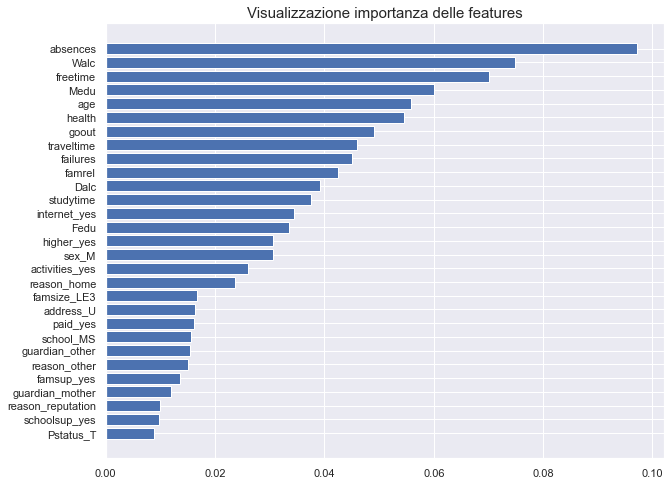

In [60]:
X = new_data.drop(['G1','G2','G3'],axis=1) # variabile che utilizzerò per plottare le features
# visualizzo la features importance del modello 
model = ensemble.GradientBoostingRegressor(loss='lad', max_depth=4, learning_rate=  0.109, n_estimators= 80)  # Copio il modello che ha ottenuto i risulati migliori
model.fit(new_X_test, y_test_scaled)
feature_importance = model.feature_importances_   # Ricavo il peso percentuale delle features
sorted_idx = model.feature_importances_.argsort()  # Ottengo l'ordine dal più basso al più alto

for i in sorted_idx:  # Stampo il valore delle features
    print('Feature: {}, Score: {:.5f}' .format(X.columns[i],  model.feature_importances_[i]))


fig, axes = plt.subplots(figsize=(10,8), sharey= False)
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx] ) 
plt.title ("Visualizzazione importanza delle features", size = 15);

Analizzando il grafico è possibile individuare le principali variabili indipendenti tali da influenzare il voto finale per il corso di porteghese (di seguito si sono considerate quelle variabili con un peso percentuale superiore al 5%):
- **numero di assenze**: rispetto a quanto rilevato precedentemente, ed in accordo con le ipotesi iniziali, tale variabile esibisce un peso rilevante nella predizione del fenomeno osservato. Credo che questa considerazione (seppur scontata) valga soprattutto per un corso di lingua la cui abilità aumenta con l'acuirsi del numero di ore trascorse frequentando e partecipando attivamente alle attività di listening, writing e talking; 
- **utiizzo di alcolici durante il weekend**: non sorprende osservare la presenza di tale *feature* nella lista delle principali, considerando quelli che sono gli effetti di lungo termine derivanti dal consumo di questa sostanza, il cui abuso va ad inficiare non solo la sfera psicofisica ma anche, e soprattutto, quella cognitiva; 
- **età**: rammentando le informazioni carpite dal grafico heatmap, una correlazione negativa di tale varibile con 'G3' potrebbe giustificarsi in una maggiore difficoltà degli esami riscontrati dagli studenti (questa rappresenta, tuttavia una mera speculazione);
- **tempo libero**: la variabile freetime cattura il tempo trascorso lontano dai libri, per cui banalmente maggiore è il suo valore minore risulterà il tempo dedicato allo studio con conseguente peggioramento del voto finale;
- **educazione materna**: la presenza di una madre con un certo grado di istruzione rappresenta un elemento che influenza positivamente le performance degli studenti. La ragione di ciò potrebbe risiedere nel fatto che generalmente è la madre ad assurgere ai compiti di educare e 'vigilare' sui risultati scolastici del/della figlio/a;
- **stato di salute**: tale variabile non risulta legata a fattori famigliari o sociali di sorta, in quanto vincolata a situazioni strettamente personali dello studente;
- **qualità delle relazioni familiari**: questa variabile cattura un aspetto psicologico, consentendo di affermare che la presenza di buoni rapporti all'interno del nucleo familiare positivi e qualitativamente buoni e sani, influenzano le prestazioni dello studente migliorandole;

Da quanto rilevato sopra, è possibile asserire che le ipotesi effettuate in fase di pre-analisi si sono rivelate pressoché corrette evidenziando il ruolo centrale che assumono le variabili appartenenti al gruppo **caratteristiche familiari** e **consuetudini comportamentali scolastiche** nella determinazione di G3. 